train set accuracy :0.960
test set accuracy :0.920


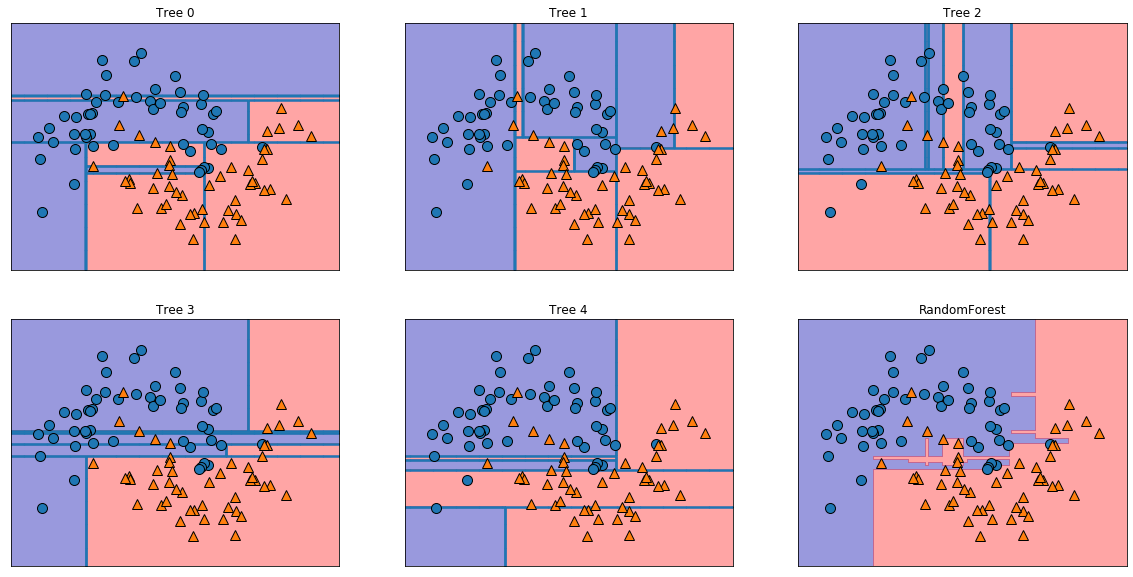

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot  as plt
import mglearn
%matplotlib inline


X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots (2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax) # decision tree 시각화해서 그린것

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
 #2차원 데이터셋 분할 평면 그리기(모델객체, train데이터, 평면 채우기, 투명도)
axes[-1, -1].set_title("RandomForest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

print("train set accuracy :{:.3f}".format(forest.score(X_train, y_train)))
print("test set accuracy :{:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
# 다섯개의 Decision Tree

In [5]:
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("test data predict :{}".format(clf.predict(X_test)))
print("test data accuracy:{:.2f}".format(clf.score(X_test, y_test)))


test data predict :[1 0 1 0 1 0 0]
test data accuracy:0.86


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


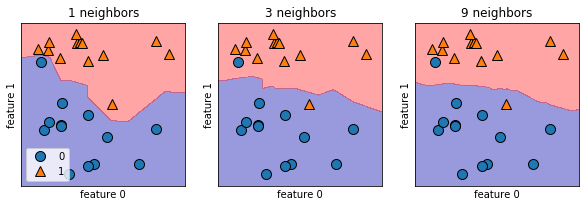

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1") 
axes[0].legend(loc=3)



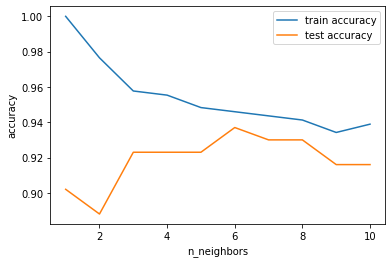

In [7]:
#이웃 개수와 train, test dataset의 성능 평가
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,  random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1, 11)  # 이웃수 범위 1~10

for n_neighbors in neighbors_settings :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
X = iris.data
y = iris.target
standardizer = StandardScaler() # 표준화 객체
X_std = standardizer.fit_transform(X) # 특성을 표준화

# 5개의 이웃을 사용한 KNN 분류기를 훈련합니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
[ 1, 1, 1, 1]] # 두 개의 샘플을 만듭니다.
print(knn.predict(new_observations)) # 두 샘플의 클래스를 예측
print(knn.predict_proba(new_observations)) # 각 샘플이 세 클래스에 속할 확률을 확인

[1 2]
[[0.  0.6 0.4]
 [0.  0.  1. ]]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris() # 데이터 로드
X = iris.data
y = iris.target
standardizer = StandardScaler() # 표준화 객체
X_std = standardizer.fit_transform(X) # 특성을 표준화
# 5개의 이웃을 사용한 KNN 분류기를 훈련합니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
[ 1, 1, 1, 1]] # 두 개의 샘플을 만듭니다.
print(knn.predict(new_observations)) # 두 샘플의 클래스를 예측
print(knn.predict_proba(new_observations)) # 각 샘플이 세 클래스에 속할 확률을 확인

[1 2]
[[0.  0.6 0.4]
 [0.  0.  1. ]]


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets

boston = datasets.load_boston() # 데이터 로드
features = boston.data[:,0:2] #두 개의 특성만 선택
target = boston.target
knn_regressor = KNeighborsRegressor(n_neighbors=10) # 최근접 회귀 모델 객체 생성
model = knn_regressor.fit(features, target) # 모델 훈련

# 첫 번째 샘플의 타깃 값을 예측하고 1000을 곱합니다.
print(model.predict(features[0:1])[0]*1000)

import numpy as np

indices = model.kneighbors(features[0:1], return_distance=False)
print(np.mean(target[indices]) * 1000)

32440.000000000004
32440.000000000004


### KNN 성능 평가, 보고서

In [25]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
print(df.head())
print(df.info()) # 열들에 대한 정보

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age        

In [26]:
# deck 삭제 : NaN 값이 너무 많아서
# embarked와 embark_town 열의 이미가 동일하므로 embarked_town 삭제
rdf = df.drop(['deck','embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [27]:
print(len(rdf))

# age에도 NaN 데이터를 가지는 행 삭제(고유값으로 확인 가능)
# 고유값 ?이면 NaN -> drop.na
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

891
714


In [31]:
# embarked 열에 NaN 값을 가장 많은 승선도시 값으로 치환

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print(rdf.describe(include='all'))
rdf['embarked'].fillna(most_freq, inplace=True)

S
          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000  

In [32]:
# 분석에 활용할 특성 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked' ]]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [33]:
# 범주형 데이터(sex, embarked)를 정수형으로 변환(one hot encoding)

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [35]:
#특성(독립변수)과 타겟(종속변수) 분리
X = ndf[[ 'pclass', 'age', 'sibsp', 'parch', 'female','male','town_C','town_Q','town_S']]
y = ndf['survived']

In [36]:
#특성(독립변수) 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [37]:
# train,  test dataset 분리 (7: 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('train data 개수:', X_train.shape)
print('test data 개수;', X_test.shape)

train data 개수: (499, 9)
test data 개수; (215, 9)


In [38]:
# KNN 분류(k=5로 설정)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)   
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [40]:
## 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

# 

[[109  16]
 [ 25  65]]


In [41]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

